Assignment 6 - Assignment on Regression technique. Download temperature data from below

link.
https://www.kaggle.com/venky73/temperaturesof-india?select=temperatures.
csv This data consists of temperatures of INDIA averaging the temperatures
of all places month wise. Temperatures values are recorded in CELSIUS
a) Apply Linear Regression using suitable library function and predict the
Month-wise temperature.
b) Assess the performance of regression models using MSE, MAE and R-Square
metrics
c) Visualize simple regression model.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [4]:
# Load the dataset
temp = pd.read_csv("temperatures.csv")
display(temp.head())

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JAN-FEB,MAR-MAY,JUN-SEP,OCT-DEC
0,1901,22.40,24.14,29.07,31.91,33.41,33.18,31.21,30.39,30.47,29.97,27.31,24.49,28.96,23.27,31.46,31.27,27.25
1,1902,24.93,26.58,29.77,31.78,33.73,32.91,30.92,30.73,29.80,29.12,26.31,24.04,29.22,25.75,31.76,31.09,26.49
2,1903,23.44,25.03,27.83,31.39,32.91,33.00,31.34,29.98,29.85,29.04,26.08,23.65,28.47,24.24,30.71,30.92,26.26
3,1904,22.50,24.73,28.21,32.02,32.64,32.07,30.36,30.09,30.04,29.20,26.36,23.63,28.49,23.62,30.95,30.66,26.40
4,1905,22.00,22.83,26.68,30.01,33.32,33.25,31.44,30.68,30.12,30.67,27.52,23.82,28.30,22.25,30.00,31.33,26.57


In [5]:
# Define features (X) and target variable (y)
X = temp.drop(columns=['ANNUAL', 'YEAR']) 
y = temp['ANNUAL']

In [6]:
# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [8]:
# Predict the target variable on the test set
y_pred = model.predict(X_test)


In [9]:
# Evaluate model performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

In [12]:

# Print evaluation metrics
print("Model Performance Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.5f}")
print(f"Mean Squared Error (MSE): {mse:.5f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.5f}")
print(f"R-squared (R2): {r2:.5f}")


Model Performance Metrics:
Mean Absolute Error (MAE): 0.03172
Mean Squared Error (MSE): 0.00606
Root Mean Squared Error (RMSE): 0.07786
R-squared (R2): 0.98746


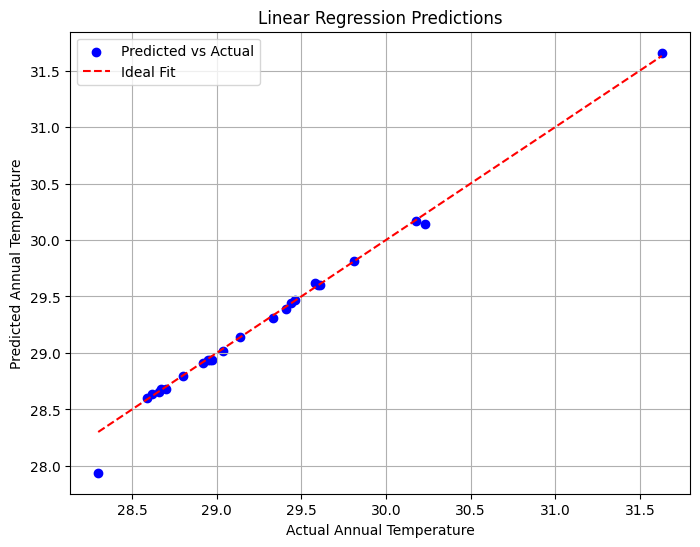

In [13]:
# Visualize the regression model
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='dashed', color='red', label='Ideal Fit')
plt.xlabel('Actual Annual Temperature')
plt.ylabel('Predicted Annual Temperature')
plt.title('Linear Regression Predictions')
plt.legend()
plt.grid()
plt.show()

In [14]:
# Predict Month-wise Temperatures
month_predictions = model.predict(X)

In [15]:

# Add predicted month-wise temperatures to the dataset
temp['Predicted_ANNUAL'] = month_predictions
print(temp[['YEAR', 'ANNUAL', 'Predicted_ANNUAL']].head())

   YEAR  ANNUAL  Predicted_ANNUAL
0  1901   28.96         28.939051
1  1902   29.22         29.219679
2  1903   28.47         28.529680
3  1904   28.49         28.497458
4  1905   28.30         27.939219
